<a href="https://colab.research.google.com/github/HARDECOMM/HDA-MLPortfolio/blob/main/Copy_of_Ademoye_H__A_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<center> HARUNA ADEGOKE ADEMOYE</center>**
**<center>(CareerEx Final Project)</center>**

## **<center>SUPERVISED BY Prof. EMMANUEL ANI</center>**
<center>(B.ML/AI Professional)</center>

## **This is the Istallation of all the used libraires for this project**

In [ ]:
# Here is my libraries for the task

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import RandomizedSearchCV

## **Data Importation**

In [ ]:
## I imported the data to use for the project

data = "income_data - income_data.csv"
df = pd.read_csv(data)

**Initial Data Insepection or data exploration**

In [ ]:
## i check the few head of my data to have an overview of it

df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
# I check the shape of my dataset

df.shape

(48842, 15)

In [ ]:
# I check the datatypes and statitics information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# I check for the columns name in the dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
## I Check for the missing values in the dataset

df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [ ]:
## I check for Duplicated Values in the dataset

df.duplicated().sum()

48

## Data Cleaning

**I Cleaned some issues I found during the exploration above**  

In [ ]:
## I rename my columns name for consistency and inplace it to make it parmanent, and print out the new columns

df.rename(columns = {"age":'Age', 'workclass':'Workclass', 'fnlwgt':'Fnlwgt',
        'education':'Education', 'education-num':'EducationNum',
        'marital-status':'MaritalStatus', 'occupation':'Occupation',
        'relationship':'Relationship', 'race':'Race', 'sex':'Sex',
        'capital-gain':'CapitalGain', 'capital-loss':'CapitalLoss',
        'hours-per-week':'HoursPerWeek', 'native-country':'NativeCountry',
        'income':'Income'}, inplace = True)
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Income'],
      dtype='object')

In [ ]:
## I imputed the missing values with simple imputer, because i need enough data to handle my task.

impute = SimpleImputer(strategy='most_frequent')
impute.fit(df[['Occupation']])
impute.fit(df[['NativeCountry']])
impute.fit(df[['Workclass']])

SimpleImputer(strategy='most_frequent')

In [ ]:
## I dropped the duplicated values

df.drop_duplicates(inplace = True)

In [ ]:
## I dropped the irrelevant column, it is actually a unique number that can be used for identification.

df.drop('Fnlwgt', axis = 1, inplace = True)

## **TASK 1**. Exploratory Data Analysis (aka EDA)

## EDA can be performed based on the problem to solve with data
   **Here i was asked to generate at least 3 meaningful insights, below are my 6 insights;**

- Is there an impact in relationship and the number of hours worked per week?
- How does education relate to the education number?
- How does capital gain categorize by sex?
- How does CapitalLoss categorize by Race?
- What is the age distribution pathern of the person's?
- Is there a correlation between Hour Per Week and Capital Gain.

**Is there an impact in relationship and the number of hours worked per week?**

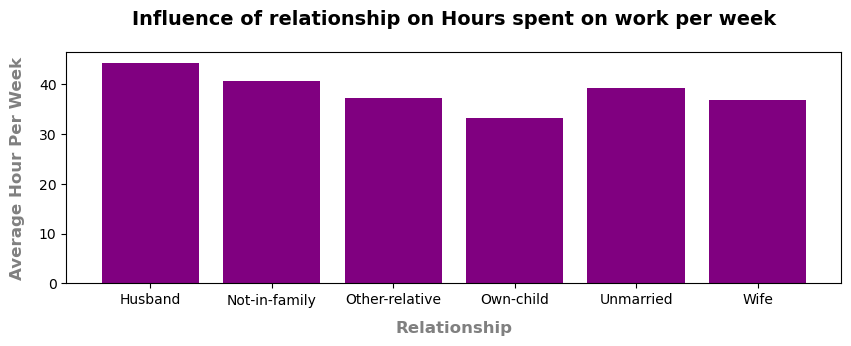

In [ ]:
# I group my HourPerWeek by Education, aggregated and then, named it as relat
relat = df.groupby('Relationship')['HoursPerWeek'].mean()

# I separate my data into x and y axis
x = relat.index
y= relat.values

# I plot a bar chat to visualize my insight
plt.figure(figsize = (10, 3))
plt.bar(x, y, color ='purple')
plt.xlabel('Relationship', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.ylabel('Average Hour Per Week', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.title("Influence of relationship on Hours spent on work per week", fontsize=14, fontweight='bold', color='black', pad=20)
plt.xticks(fontsize=10, color = 'black')
plt.yticks(fontsize=10, color = 'black')
plt.show()

**How does education relate to the education number?**

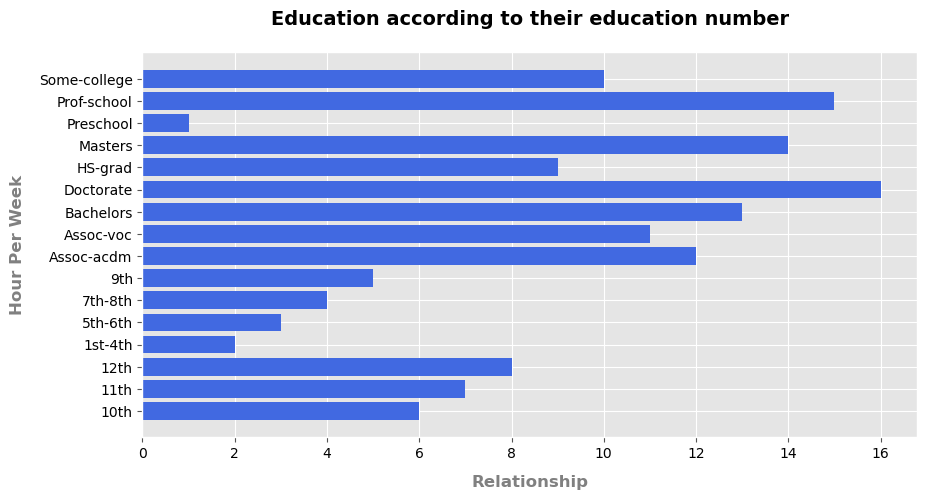

In [ ]:
# I group my HourPerWeek by Education, aggregated and then, named it as relat
edu_cat = df.groupby('Education')['EducationNum'].mean()

# I set figure and size
plt.figure(figsize = (10, 5))
style.use('ggplot')

# I separate my data into x and y axis
x = edu_cat.index
y= edu_cat.values

# I plot the chart to visualize my data
plt.barh(x, y, color ='royalblue')
plt.xlabel('Relationship', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.ylabel('Hour Per Week', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.title("Education according to their education number", fontsize=14, fontweight='bold', color='black', pad=20)
plt.xticks(fontsize=10, color = 'black')
plt.yticks(fontsize=10, color = 'black')
plt.show()

**How does capital gain categorize by sex?**

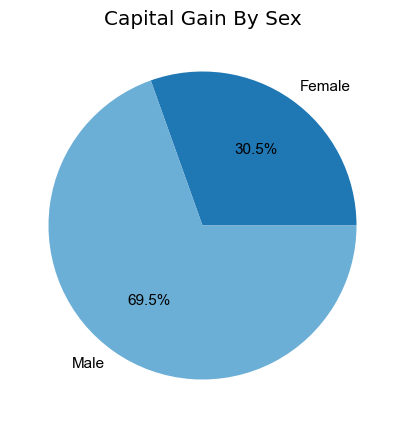

In [ ]:
## - How does capital gain categorize by sex?

# I set figure and style
plt.figure(figsize = (10, 5))
style.use("ggplot")

# I group my data
sex_gain = df.groupby('Sex')['CapitalGain'].mean()

# I named my data x
x = sex_gain

# I set my customize params
labels = ['Female', 'Male', ]
colors = ['#1f77b4', '#6baed6']
textprops = {'color': 'black', 'font':'Arial', 'size':11}

plt.pie(x, labels = labels, colors = colors, textprops = textprops, autopct = "%1.1f%%")
plt.title("Capital Gain By Sex")
plt.show()

**How does CapitalLoss categorize by Race?**

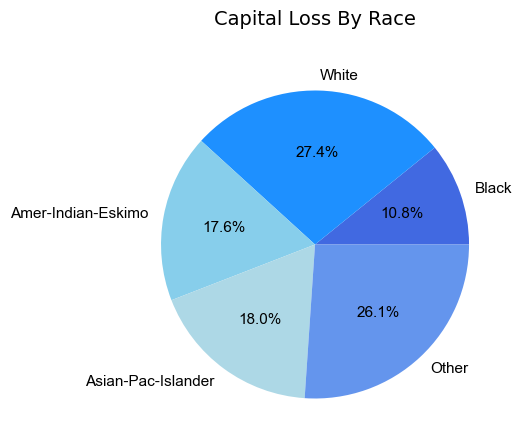

In [ ]:
## How does Capital Loss categorize by Race?

# I set figure and style
plt.figure(figsize = (10, 5))
style.use("ggplot")

# I group my data
sex_gain = df.groupby('Race')['CapitalLoss'].mean()

# I named my data x
x = sex_gain

# I set my customize params
labels = ['Black', 'White', 'Amer-Indian-Eskimo','Asian-Pac-Islander', 'Other']
colors = ['#4169e1', '#1e90ff', '#87ceeb', '#add8e6', '#6495ed']
textprops = {'color': 'black', 'font':'Arial', 'size':11}

plt.pie(x, colors = colors, labels=labels, textprops = textprops, autopct = "%1.1f%%")
plt.title("Capital Loss By Race", color='black', fontsize=14, pad=20)
plt.show()

**What is the person's age distribution pattern?**

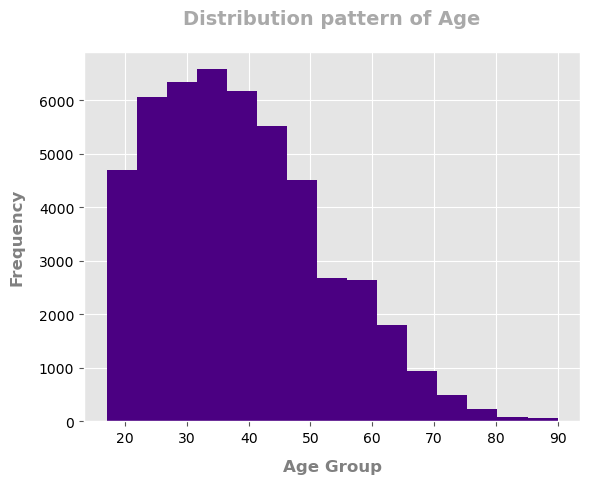

In [ ]:
## What distribution pattern does Age follows?

x = df.Age

plt.hist(x, bins = 15, color = 'indigo')
plt.xlabel('Age Group', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.title('Distribution pattern of Age', fontsize=14, fontweight='bold', color='darkgray', pad=20)
plt.xticks(fontsize=10, color = 'black')
plt.yticks(fontsize=10, color = 'black')
plt.show()

**Is there a correlation between Hour Per Week and Capital Gain.**

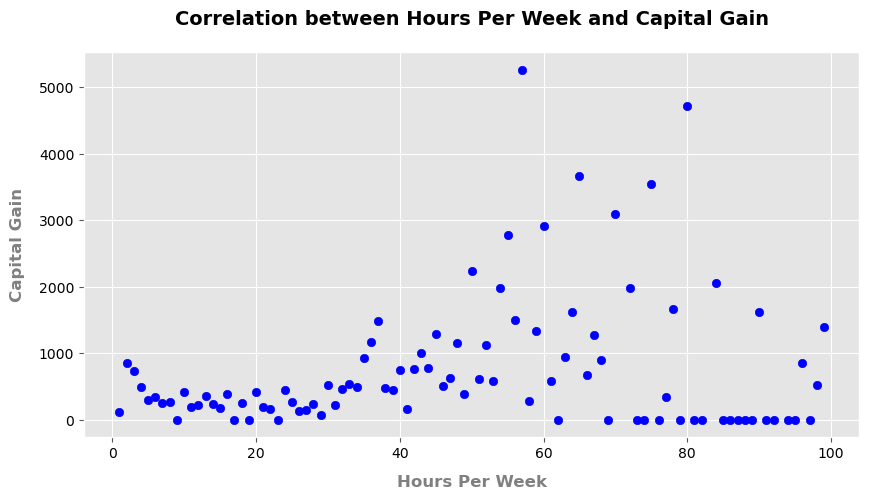

In [ ]:
# I group my Capital by Hours of the week, aggregated it mean, and then, named it as corr_anal
corr_anal = df.groupby('HoursPerWeek')['CapitalGain'].mean()

# I separate my data into x and y axis
x = corr_anal.index
y= corr_anal.values

plt.figure(figsize = (10, 5))
plt.scatter(x, y, color ='blue')
plt.xlabel('Hours Per Week', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.ylabel('Capital Gain', fontsize=12, fontweight='bold', color='gray', labelpad=10)
plt.title("Correlation between Hours Per Week and Capital Gain", fontsize=14, fontweight='bold', color='black', pad=20)
plt.xticks(fontsize=10, color = 'black')
plt.yticks(fontsize=10, color = 'black')
plt.show()

## **Second Task** To Develop ML model that can predict whether a person exceed or not exceed $50k/year.

My task here is classification task which is based on predicting whether a binary outcome **"exceed" or "not exceed"** can be classified as
either exceed or not exceed with ML Algorithms.  

In [ ]:
## I seperate my data into features and target and named them X and y.

X = df.drop(columns=['Income'], axis = 1)
y = df['Income']

In [ ]:
# I handled my target variable seperately with Label Encoder, and attached to y.

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

**Based on strenghts, weaknessess, assumptions and economy, I selected 3 best algorithms to use for my model**

- LogisticRegression()
- RandomForestClassifier
- GradientBoostingClassifier

## **I used pipeline to streamline my workflow.**

**Preprocesssing stage**

On my features (my features is not too much to try some method like PCA or feature selection)
- i want to seperate my numerical and categorical features
- i want to encode my category variables
- i want to scale my numerical variables

In [ ]:
## I seperated my features into numeric and non-numeric to perform easy task on each.
cat_features = X.select_dtypes(exclude = np.number).columns.tolist()
num_features = X.select_dtypes(include = np.number).columns.tolist()
target = y

# I encoded my categorical features
cat_pipe = Pipeline(steps= [
        ('encod_feat', OneHotEncoder(handle_unknown="ignore")),
    ])
# I scaled my numerical features with standard scaler
num_pipe = Pipeline(steps= [
        ('scaler', StandardScaler()),
          ])
# I combined both the operation above and print it
preprocessor = ColumnTransformer(transformers=[
    ('category', cat_pipe, cat_features),
    ('numerical', num_pipe, num_features),
         ])
# I combined both the operation above and print it
preprocessing_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
         ])

In [ ]:
display(preprocessing_pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('encod_feat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Workclass', 'Education',
                                                   'MaritalStatus',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex',
                                                   'NativeCountry']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'EducationNum',
                                                   'CapitalGain', 'CapitalLoss',
                                                   'HoursPerWeek'])]))])

**Data preprocessing on pipeline**

- Here I linked my X(features) data to my pipeline to reflect the preprocessing action

In [ ]:
# I fitted my final pipe to my X(features), using, so it can apply all the process above on them.

X = preprocessing_pipe.fit_transform(X)

In [ ]:
# I split my preprocessed X(features) together with my y_target into 2 each, for both testing and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

## **Model development stage on pipeline**
- I linked my 3 algorthms with pipeline
- I trained my models on the algorithms
- I used my models to make prediction for accurary and classification report, and
- I used my model to make prediciton based on probability for ROC $ AUC assessment

**I linked my 3 Algorithms with a pipeline and then, train my models**

In [ ]:
# pipeline for logistic regression
log_model = Pipeline(steps=[
        ('LogisticRegression', LogisticRegression(max_iter=800)),
         ])
# for random forest classifier
forest_model = Pipeline(steps=[
        ('RandomForestClassfier', RandomForestClassifier()),
        ])
# for Gradient boosting classifier
grad_model = Pipeline(steps=[
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ])
# I train my models with trainig pipeline
train_pipe = Pipeline(steps=[
        ('LogisticRegression', log_model.fit(X_train, y_train)),
        ('RandomForestClassfier', forest_model.fit(X_train, y_train)),
        ('GradientBoostingClassifier', grad_model.fit(X_train, y_train)),
        ])
display(train_pipe)

Pipeline(steps=[('LogisticRegression',
                 Pipeline(steps=[('LogisticRegression',
                                  LogisticRegression(max_iter=800))])),
                ('RandomForestClassfier',
                 Pipeline(steps=[('RandomForestClassfier',
                                  RandomForestClassifier())])),
                ('GradientBoostingClassifier',
                 Pipeline(steps=[('GradientBoostingClassifier',
                                  GradientBoostingClassifier())]))])

**I used my model to predict unseen features (X_test)**

In [ ]:
# I use my models to make prediction
predict_pipe = Pipeline(steps=[
        ('LogisticRegression', log_model.predict(X_test)),
        ('RandomForestClassfier', forest_model.predict(X_test)),
        ('GradientBoostingClassifier', grad_model.predict(X_test)),
        ])
display(predict_pipe)

Pipeline(steps=[('LogisticRegression', array([1, 1, 0, ..., 0, 0, 0])),
                ('RandomForestClassfier', array([0, 1, 0, ..., 0, 0, 0])),
                ('GradientBoostingClassifier', array([1, 1, 0, ..., 0, 0, 0]))])

**I used my model to predict unseen based on probability and slice only the positive value FOR roc-auc purpose**

In [ ]:
# I use my models to make prediction based on probabilities for ROC-AUC assessment(+ only)
predict_proba_pipe = Pipeline(steps=[
        ('LogisticRegression', log_model.predict_proba(X_test)[:, 1]),
        ('RandomForestClassfier', forest_model.predict_proba(X_test)[:, 1]),
        ('GradientBoostingClassifier', grad_model.predict_proba(X_test)[:, 1]),
        ])

display(predict_proba_pipe)

Pipeline(steps=[('LogisticRegression',
                 array([0.80571589, 0.96197417, 0.00140958, ..., 0.00131001, 0.03441691,
       0.00704338])),
                ('RandomForestClassfier',
                 array([0.24083333, 1.        , 0.        , ..., 0.        , 0.        ,
       0.05      ])),
                ('GradientBoostingClassifier',
                 array([0.74107505, 0.97504574, 0.00720679, ..., 0.00644909, 0.01509098,
       0.0099305 ]))])

## **Model Evaluations**

**The Evaluation stage is based on comparison between the y_predicted by my models and the original y test**

In [ ]:
## I extract the predicting value for each of my model from the combined predicit_pipe array

log_y_pred = predict_pipe[0]
forest_y_pred = predict_pipe[1]
grad_y_pred = predict_pipe[2]

**Firstly, I evaluated my models with Accuracy**

In [ ]:
# Accuracy for all my models

accuracy = accuracy_score(y_test, log_y_pred)
print(f" LogisticModelAccuracy: {round(accuracy, 2)*100}%")

accuracy = accuracy_score(y_test, forest_y_pred)
print(f" ForestAccuracy: {round(accuracy, 2)*100}%")

accuracy = accuracy_score(y_test, grad_y_pred)
print(f" GradientBoosting: {round(accuracy, 2)*100}%")

 LogisticModelAccuracy: 85.0%
 ForestAccuracy: 84.0%
 GradientBoosting: 86.0%


**Secondly, I evaluated my models with classification_report which includes precision, F1_score & recall.**

In [ ]:
## Classification report for all the models

log_report = classification_report(y_test, log_y_pred)
forest_report = classification_report(y_test, forest_y_pred)
grad_report = classification_report(y_test, grad_y_pred)

print(log_report)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(forest_report)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(grad_report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7366
           1       0.73      0.59      0.65      2393

    accuracy                           0.85      9759
   macro avg       0.80      0.76      0.78      9759
weighted avg       0.84      0.85      0.84      9759

++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7366
           1       0.71      0.61      0.65      2393

    accuracy                           0.84      9759
   macro avg       0.79      0.76      0.78      9759
weighted avg       0.84      0.84      0.84      9759

++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7366
           1       0.78      0.59      0.67      2393

    accuracy                           0.86      9759
   macro avg  

**Thirdly, I evaluated my models with confusion matrix and then visualize it.**

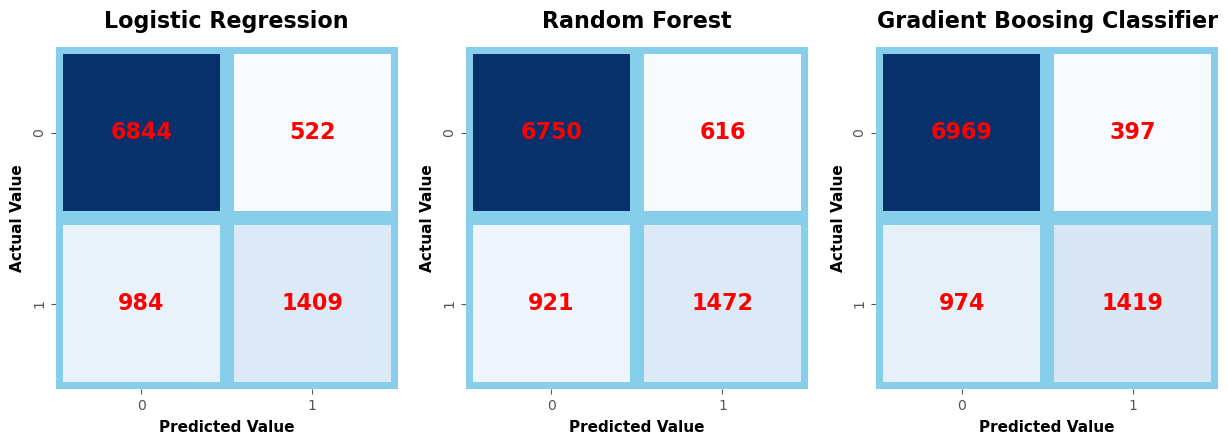

In [ ]:
## Confusion matrix for my models

log_matrix = confusion_matrix(y_test, log_y_pred)
forest_matrix = confusion_matrix(y_test, forest_y_pred)
grad_matrix = confusion_matrix(y_test, grad_y_pred)

# i set the figure size and axes for subplotted my models
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), dpi = 100)

# I created heatmap for each of my models
sns.heatmap(log_matrix, cbar=False, ax=axes[0], annot_kws={"fontsize": 10},
            fmt='d', linewidths = 10, cmap='Blues', linecolor = 'skyblue')
axes[0].set_title('Logistic Regression', pad = 14, color = 'black', fontsize = 16, fontweight = 'bold')
axes[0].set_xlabel('Predicted Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')
axes[0].set_ylabel('Actual Value', labelpad = 5, color ='black', fontsize = 11, fontweight = 'bold')

sns.heatmap(forest_matrix, cbar=False, ax=axes[1], annot_kws={"fontsize": 10}, fmt='d', linewidths = 10,
            cmap='Blues', linecolor = 'skyblue')
axes[1].set_title('Random Forest', pad = 14, color = 'black', fontsize = 16, fontweight = 'bold')
axes[1].set_xlabel('Predicted Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')
axes[1].set_ylabel('Actual Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')

sns.heatmap(grad_matrix, cbar=False, ax=axes[2], annot_kws={"fontsize": 10}, fmt='d', linewidths = 10,
            cmap='Blues', linecolor = 'skyblue')
axes[2].set_title('Gradient Boosing Classifier', pad = 14, color = 'black', fontsize = 16, fontweight = 'bold')
axes[2].set_xlabel('Predicted Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')
axes[2].set_ylabel('Actual Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')

# my annotation does not display, i iterated for annotation
for ax, matrix in zip(axes.flatten(), [log_matrix, forest_matrix, grad_matrix]):
    ax.set_aspect('equal')
    for (a, b), value in np.ndenumerate(matrix):
        ax.text(b + 0.5, a + 0.5, value, ha='center', va='center', color='red', fontweight = 'bold',
                fontsize = 16)

## I Evaluated my models with Receiver Operating Characteristics Curve (aka ROC-AUC)
**Note: The Roc-Auc evaluation is worked based on predict_probability of the positive prediction only**

In [ ]:
## I slice my predic_proba from the predict_proba positive array in the predic_proba_pipe.

pred_y_proba_log = predict_proba_pipe[0]
pred_y_proba_forest = predict_proba_pipe[1]
pred_y_proba_grad = predict_proba_pipe[2]

In [ ]:
# ROC-AUC computation for my models

fpr_log, tpr_log, thresh = roc_curve(y_test, pred_y_proba_log)
Auc_Score_Log = auc(fpr_log, tpr_log)

fpr_forest, tpr_forest, thresh = roc_curve(y_test, pred_y_proba_forest)
Auc_Score_forest = auc(fpr_forest, tpr_forest)

fpr_grad, tpr_grad, thresh = roc_curve(y_test, pred_y_proba_grad)
Auc_Score_grad = auc(fpr_grad, tpr_grad)

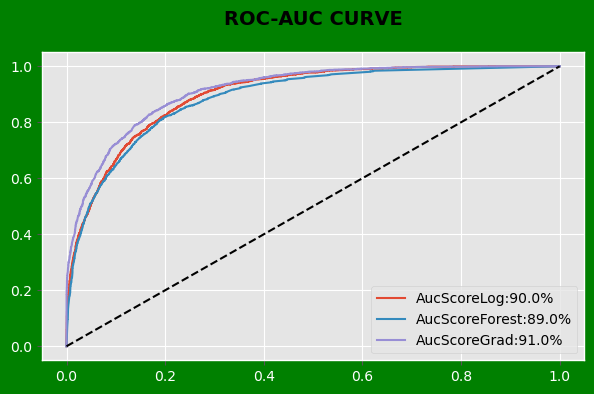

In [ ]:
## I plot ROC-AUC

plt.figure(figsize = (7, 4), facecolor = 'green', edgecolor = 'black')
plt.plot(fpr_log, tpr_log, label=f"AucScoreLog:{round(Auc_Score_Log, 2)*100}%")
plt.plot(fpr_forest, tpr_forest, label=f"AucScoreForest:{round(Auc_Score_forest, 2)*100}%")
plt.plot(fpr_grad, tpr_grad, label=f"AucScoreGrad:{round(Auc_Score_grad, 2)*100}%")
plt.plot([0, 1], [0, 1], 'k--')
plt.xticks(fontsize = 10, color = 'white' )
plt.yticks(fontsize = 10, color = 'white' )
plt.title("ROC-AUC CURVE", fontsize=14, fontweight='bold', color='black', pad=20)
plt.legend()
plt.show()

#### **RE-EVALUATION OF THE BEST PERFOMING ALGORITHM FOR MY MODEL WITH HYPERPARAMETER TUNING**
**After my evaluation based on different Evaluation metrics, i have decided to choose Gradient Boosting Classifier, it is the best algorthm for my task**  

## **Hyperparameter Tuning takes time. below are the little i can work with because of time**

In [ ]:
## I tunned randomly the hyperparameter for the best performing algorithm for my model(gradient boosting)

grad_model = GradientBoostingClassifier(min_samples_split=0.8, min_samples_leaf=10, max_leaf_nodes=700,
                                        learning_rate=1.5, random_state=400, n_estimators=200)

# Define the range for hyperparameters
params = {
    'n_estimators': [200, 500],
    'random_state': [200, 400],
         }

rand_search = RandomizedSearchCV(estimator=grad_model, param_distributions=params, cv=5,
                                 random_state=42, n_iter=1, n_jobs=2, scoring='accuracy', verbose=False)

# I fitted my hyperparameters on my data
rand_search.fit(X_train, y_train)

# I print out the best parameters and accuray score

print(f"Best Parameters: {rand_search.best_params_}")
print(f"Best Accuracy Score: {rand_search.best_score_}")

Best Parameters: {'random_state': 400, 'n_estimators': 200}
Best Accuracy Score: 0.8670680158831818


In [ ]:
grad_model = GradientBoostingClassifier()

# Define the range for hyperparameters
params1 = {
    'max_depth':    [5, 4, 3],
    'ccp_alpha':    [-0.0, 0.001, 0.002],
         }

rand_search1 = RandomizedSearchCV(estimator=grad_model, param_distributions=params1, cv=5,
                                 random_state=42, n_iter=3, n_jobs=2, scoring='accuracy', verbose=False)

# I fitted my hyperparameters on my data
rand_search1.fit(X_train, y_train)

# I print out the best parameters and accuray score

print(f"Best Parameters: {rand_search1.best_params_}")
print(f"Best Accuracy Score: {rand_search1.best_score_}")

Best Parameters: {'max_depth': 4, 'ccp_alpha': -0.0}
Best Accuracy Score: 0.8723453311131036


In [ ]:
grad_model = GradientBoostingClassifier()

# Define the range for hyperparameters
params1 = {
    'learning_rate': [0.1, 2.0, 1.5, 3.0],
    'min_samples_leaf': [30, 10, 20],
    'min_samples_split': [0.9, 0.1, 0.8, 0.7],
    'max_leaf_nodes': [700, 800, 900, 1000],
         }

rand_search1 = RandomizedSearchCV(estimator=grad_model, param_distributions=params1, cv=3,
                                 random_state=42, n_iter=1, n_jobs=2, scoring='accuracy', verbose=False)

# I fitted my hyperparameters on my data
rand_search1.fit(X_train, y_train)

# I print out the best parameters and accuray score

print(f"Best Parameters: {rand_search1.best_params_}")
print(f"Best Accuracy Score: {rand_search1.best_score_}")

Best Parameters: {'min_samples_split': 0.8, 'min_samples_leaf': 10, 'max_leaf_nodes': 700, 'learning_rate': 1.5}
Best Accuracy Score: 0.8684769649813285


## I fixed some parameters from hyperparamer tuning on my best selected model (GradientBoostingClassifier), and then retrain it

In [ ]:
# I fixed the tunnned parameters on my best model

grad_model = Pipeline(steps=[
        ('GradientBoostingClassifier', GradientBoostingClassifier(min_samples_leaf=10, max_leaf_nodes=700,
                                                                  n_estimators=200, random_state=400, max_depth=4,
                                                                  ccp_alpha=0.0)), ])

# I re_trained my model

grad_train_pipe = Pipeline(steps=[
        ('GradientBoostingClassifier', grad_model.fit(X_train, y_train)),
        ])

display(grad_train_pipe)

Pipeline(steps=[('GradientBoostingClassifier',
                 Pipeline(steps=[('GradientBoostingClassifier',
                                  GradientBoostingClassifier(max_depth=4,
                                                             max_leaf_nodes=700,
                                                             min_samples_leaf=10,
                                                             n_estimators=200,
                                                             random_state=400))]))])

**I used my best model to make prediction**

In [ ]:
# prediction for unseen (y_pred) with (X_test)

grad_predict_pipe = Pipeline(steps=[
        ('GradientBoostingClassifier', grad_train_pipe.predict(X_test)),
        ])

display(grad_predict_pipe)

Pipeline(steps=[('GradientBoostingClassifier', array([1, 1, 0, ..., 0, 0, 0]))])

**I used my best model to make prediction based on probabilies**

In [ ]:
# I use my models to make prediction based on probabilities for ROC-AUC assessment(+ only)

grad_predict_proba_pipe = Pipeline(steps=[
        ('GradientBoostingClassifier', grad_train_pipe.predict_proba(X_test)[:, 1]),
        ])

display(grad_predict_proba_pipe)

Pipeline(steps=[('GradientBoostingClassifier',
                 array([0.72965363, 0.99081261, 0.00274485, ..., 0.00249295, 0.0125046 ,
       0.01844593]))])

**I re-evaluated my best model for accuracy**

In [ ]:
# extracted y_pred from from predict pipeline array
grad_y_pred2 = grad_predict_pipe[0]

# I re_evaluated my best model with accuracy
accuracy = accuracy_score(y_test, grad_y_pred2)
print(f" GradientBoosting: {round(accuracy, 2)*100}%")

 GradientBoosting: 87.0%


**I re_evaluated my best model with classification_report**

In [ ]:
# I re_evaluated my best model with classification_report

grad_report = classification_report(y_test, grad_y_pred2)

print(grad_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7366
           1       0.78      0.65      0.71      2393

    accuracy                           0.87      9759
   macro avg       0.84      0.80      0.81      9759
weighted avg       0.87      0.87      0.87      9759



**I re_evaluated my best model with confusion_matrix**

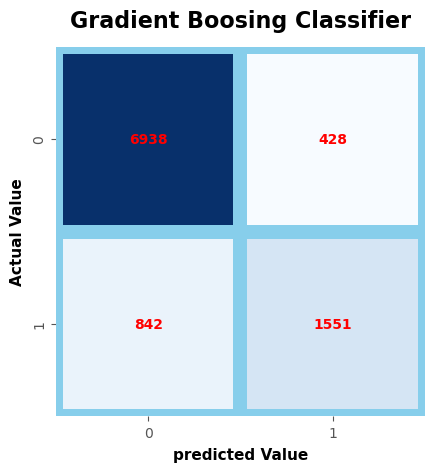

In [ ]:
# I plot my confusion matrix chart

grad_matrix = confusion_matrix(y_test, grad_y_pred2)

sns.heatmap(grad_matrix, cbar=False, annot_kws={"fontsize": 10}, fmt='d',
            square=True, linewidths = 10, cmap='Blues', linecolor = 'skyblue')
plt.title('Gradient Boosing Classifier', pad = 14, color = 'black', fontsize = 16, fontweight = 'bold')
plt.xlabel('predicted Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')
plt.ylabel('Actual Value', labelpad = 5, color = 'black', fontsize = 11, fontweight = 'bold')

# my annotation does not display, i iterated for annotation
for i in range(grad_matrix.shape[0]):
    for j in range(grad_matrix.shape[1]):
        plt.text(i + 0.5, j + 0.5, str(grad_matrix[j, i]), ha='center', va='center',
                 color='red', fontsize=10, fontweight='bold')
plt.show()

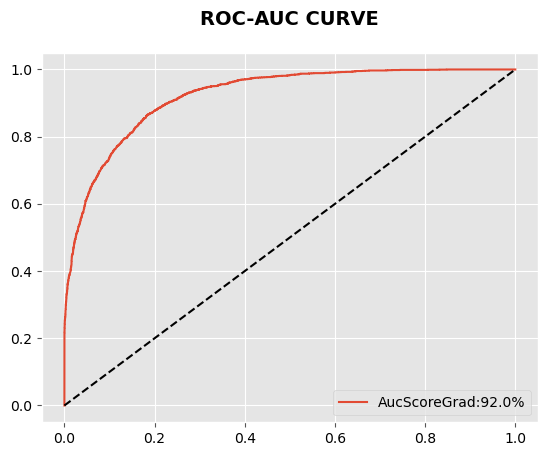

In [ ]:
# I re_evaluated my best model with ROC-AUC

pred_y_proba_grad = grad_predict_proba_pipe[0]

fpr_grad, tpr_grad, thresh = roc_curve(y_test, pred_y_proba_grad)
Auc_Score_grad = auc(fpr_grad, tpr_grad)

plt.plot(fpr_grad, tpr_grad, label=f"AucScoreGrad:{round(Auc_Score_grad, 2)*100}%")
plt.plot([0, 1], [0, 1], 'k--')
plt.xticks(fontsize = 10, color = 'black' )
plt.yticks(fontsize = 10, color = 'black' )
plt.title("ROC-AUC CURVE", fontsize=14, fontweight='bold', color='black', pad=20)
plt.legend()
plt.show()

## SUMMARY OF THE KEY INSIGHTS FROM THE EDA

-  I was able to find out the influence of **relationship position** of the person's on the number of hours worked per week. it shows that person's with **husband** spent more hours on work, follow by the person's **Not in Family**, **person's unmarried**,  and person's with **wife**. And person's that spent less hours are the person's with **child**, folloe by person's with **other relative**
  
-  I was able to find out the relationship between person's **education** and thier **education number/score**. categorically, the insight here shows that the higher the level of person's education, the greater thier education number/score.
  
-  I was able to find out how did person's **capital gain** was categorized by **Sex**. It shows that, person's that earned more capital are **male** which was about *69.6%*, followed by **female** of about **30.4%**
  
-  I was able to find out how did **capital loss** categorize by **Race**. this insight show that the most person's **race** with high **capital loss** are **white person's**, followed by **others**, **Asian Pacific Islander**, **American Indian Eskimo** and lastly the **Black**
  
-  I was able to find out the **age distribution patterns** of person's, the insight shows that there was a **right-skewed distribution patterns**, indicated that majoriry of the person's **age**.capsuring on this censors data are fall between the **highest age**, which did not show a **normal distribution**.
  
-  I was able to find out the relationship between **hours the person's worked per week** and their **Capital Gain**. the insight shows a correlation between Hours person's spent per week and how much the person's earned, but not as too as strong correlation.

## Performance of my machine learning model, its effectiveness in predicting income level, and how it can be improved

- Actually my machine learning model is performed better on different algoritms i used after a series of iteration approaches
specfifically during the preprocessing task. I observed StandardScaler as one of the normalization techniques performed better
on my model compare to MinMaxScaler. After evaluation of different metrics, i was able to detect **GradientBoosting Algorithm**
as the best algorithm for my  model with the accuracy_score of **86%,** but i dont rely on it because the majority of the classes on my
categorial variables are imbalances. I further evaluated with classifiation_report where i got an higher **prescion, F1_score, and recall**
compare to other algorithms, also with and ROC-AUC value of **91%** compare to other algorithms.

- I retrained my best performing model algorithm **GradientBoostingClassifier** with different **parameters** after **some hyperparameter** tuning
with **Randomised search approach** based on the available resources. I actually experienced little changes in accuracy from **86% to 87%** which is
quite impressive(i am happy with it that i can do better), and a higher precision, F1, and recall compare to the previous. Also an **ROC-AUC_score of 92%.** Based on the performaces of GradientBoosting algorithm discussed above, I selected GradientBoosting Algorithm as an effective algorithm for income prediction of whether a person's income exceed $50k/year or not.

- My model is performed well, and i believed if i can further explore other parameters using other method like **GRID SEARCH**
hyperparamers tuning approaches, using other algorithms such as xgboost instead of gradientboosting, and getting more data related
to the task, I can further improve my model performances.

## CONCLUSION

In conclusion, the model is predicted well, and its performaces can be improved if we added an additional relevant data.

**<center>THANK YOU FOR THE TIME<center>**